In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
import fitsio
from desitarget.cmx import cmx_targetmask
import desimodel.focalplane
%matplotlib inline

In [2]:
# reference to tile description https://desi.lbl.gov/trac/wiki/TargetSelectionWG/miniSV2
# path to data http://www.astro.utah.edu/~u6022465/SV/miniSV/

In [3]:
tile_files = {}
tile_files[0] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70500/fiberassign-070500.fits' # 119.00	50.00	Nothing in particular here, but higher declination
tile_files[1] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70501/fiberassign-070501.fits' # 135.00	0.50	GAMA-G09
tile_files[2] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70502/fiberassign-070502.fits' # 180.00	-0.50	GAMA-G12
tile_files[3] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70503/fiberassign-070503.fits' # 217.50	0.50	GAMA-G15
tile_files[4] = 'www.astro.utah.edu/~u6022465/SV/miniSV/Tile_70508/fiberassign-070508.fits' # 195.00	29.00	Coma on petal 0

In [49]:
def print_stats(tile_files, ext='TARGETS'):
    print("\nResults from the {} extension\n".format(ext))
    area = np.pi*desimodel.focalplane.get_tile_radius_deg()**2
    for i in range(5):
        print("TILE ", i)
        assigned = Table(fitsio.read(tile_files[i], ext=ext))
        flux_cut = 10**((22.5-19.5)/2.5)
        flux_r = assigned['FLUX_R']/assigned['MW_TRANSMISSION_R']
        rmag = 22.5-2.5*np.log10(flux_r)
        is_bgs_bright = assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('MINI_SV_BGS_BRIGHT')!=0
        is_bgs = assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('SV0_BGS')!=0
        is_mws = assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('SV0_MWS')!=0
        print('MAX RMAG value for MINI_SV_BGS_BRIGHT', np.max(rmag[is_bgs_bright]))
        print('NUMBER OF BRIGHT TARGETS BELOW 19.5 mag', np.count_nonzero(flux_r[is_bgs_bright] < flux_cut))
        print('MINI_SV_BGS_BRIGHT density (targets/deg^2)', np.count_nonzero(is_bgs_bright)/area)
        print('SV0_BGS density (targets/deg^2)', np.count_nonzero(is_bgs)/area)
        print('SV0_MWS density (targets/deg^2)', np.count_nonzero(is_mws)/area)
        print('STANDARDS',np.count_nonzero((assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('STD_GAIA'))!=0))
        print('RMAG BRIGHTEST TARGET', np.min(rmag[is_bgs|is_mws]))
        print('SKY', np.count_nonzero(assigned['OBJTYPE']=='SKY'))
        print()

In [50]:
print_stats(tile_files, ext='FIBERASSIGN')


Results from the FIBERASSIGN extension

TILE  0
MAX RMAG value for MINI_SV_BGS_BRIGHT 19.499788
NUMBER OF BRIGHT TARGETS BELOW 19.5 mag 0
MINI_SV_BGS_BRIGHT density (targets/deg^2) 208.5055940454409
SV0_BGS density (targets/deg^2) 346.34762077173525
SV0_MWS density (targets/deg^2) 196.60815669068663
STANDARDS 1492
RMAG BRIGHTEST TARGET 6.7839184
SKY 469

TILE  1
MAX RMAG value for MINI_SV_BGS_BRIGHT 19.499046
NUMBER OF BRIGHT TARGETS BELOW 19.5 mag 0
MINI_SV_BGS_BRIGHT density (targets/deg^2) 218.3600371069545
SV0_BGS density (targets/deg^2) 341.0598708362889
SV0_MWS density (targets/deg^2) 207.66436110116533
STANDARDS 1568
RMAG BRIGHTEST TARGET 12.643663
SKY 409

TILE  2
MAX RMAG value for MINI_SV_BGS_BRIGHT 19.499542
NUMBER OF BRIGHT TARGETS BELOW 19.5 mag 0
MINI_SV_BGS_BRIGHT density (targets/deg^2) 257.297104813423
SV0_BGS density (targets/deg^2) 401.50846668923225
SV0_MWS density (targets/deg^2) 120.89719170588675
STANDARDS 931
RMAG BRIGHTEST TARGET 11.107053
SKY 639

TILE  3
MAX

/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


In [51]:
print_stats(tile_files, ext='TARGETS')


Results from the TARGETS extension

TILE  0


/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: divide by zero encountered in true_divide
/global/common/software/desi/cori/desiconda/20190804-1.3.0-spec/conda/lib/python3.6/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in true_divide


MAX RMAG value for MINI_SV_BGS_BRIGHT 19.499788
NUMBER OF BRIGHT TARGETS BELOW 19.5 mag 0
MINI_SV_BGS_BRIGHT density (targets/deg^2) 688.0083722825067
SV0_BGS density (targets/deg^2) 2131.203576254668
SV0_MWS density (targets/deg^2) 1678.019371559937
STANDARDS 12281
RMAG BRIGHTEST TARGET 2.4703312
SKY 0

TILE  1
MAX RMAG value for MINI_SV_BGS_BRIGHT 19.49956
NUMBER OF BRIGHT TARGETS BELOW 19.5 mag 0
MINI_SV_BGS_BRIGHT density (targets/deg^2) 710.8418379128431
SV0_BGS density (targets/deg^2) 2147.427354465696
SV0_MWS density (targets/deg^2) 1993.722077933063
STANDARDS 14782
RMAG BRIGHTEST TARGET 9.777281
SKY 0

TILE  2
MAX RMAG value for MINI_SV_BGS_BRIGHT 19.499907
NUMBER OF BRIGHT TARGETS BELOW 19.5 mag 0
MINI_SV_BGS_BRIGHT density (targets/deg^2) 870.9164495949914
SV0_BGS density (targets/deg^2) 2365.0663347632717
SV0_MWS density (targets/deg^2) 921.7509546562142
STANDARDS 6902
RMAG BRIGHTEST TARGET 10.089711
SKY 0

TILE  3
MAX RMAG value for MINI_SV_BGS_BRIGHT 19.499718
NUMBER OF BR

(array([   2.,    4.,   10.,   29.,   30.,   60.,   84.,  204.,  523.,
        1176.]),
 array([11.356443, 12.174213, 12.991983, 13.809754, 14.627524, 15.445294,
        16.263065, 17.080835, 17.898605, 18.716375, 19.534145],
       dtype=float32),
 <a list of 10 Patch objects>)

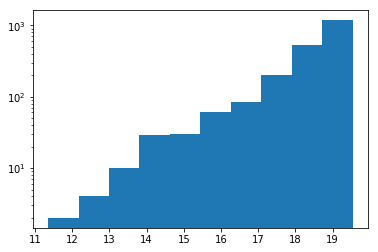

In [29]:
plt.hist(rmag[assigned['CMX_TARGET']&cmx_targetmask.cmx_mask.mask('MINI_SV_BGS_BRIGHT')!=0], log=True)

Text(0.5,1,'SKY')

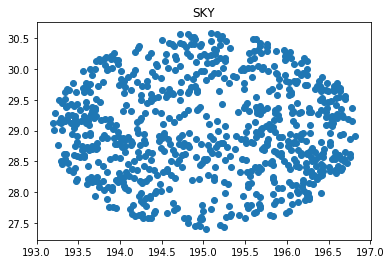

In [9]:
sky = assigned['OBJTYPE']=='SKY'
plt.scatter(assigned['TARGET_RA'][sky], assigned['TARGET_DEC'][sky])
plt.title("SKY")

In [5]:
for i in set(assigned['CMX_TARGET']):
    print(i, cmx_targetmask.cmx_mask.names(i))

72057594037928192 ['SV0_BGS', 'MINI_SV_BGS_BRIGHT']
513 ['STD_GAIA', 'SV0_MWS']
81064793292670208 ['SV0_BGS', 'SV0_LRG', 'MINI_SV_LRG', 'MINI_SV_BGS_BRIGHT']
256 ['SV0_BGS']
1280 ['SV0_BGS', 'SV0_LRG']
9007199254742272 ['SV0_BGS', 'SV0_LRG', 'MINI_SV_LRG']
512 ['SV0_MWS']
72057594037929216 ['SV0_BGS', 'SV0_LRG', 'MINI_SV_BGS_BRIGHT']
0 []
4352 ['SV0_BGS', 'SV0_QSO']
520 ['STD_TEST', 'SV0_MWS']
36028797018968320 ['SV0_BGS', 'SV0_QSO', 'MINI_SV_QSO']
108086391056896256 ['SV0_BGS', 'SV0_QSO', 'MINI_SV_QSO', 'MINI_SV_BGS_BRIGHT']
8193 ['STD_GAIA', 'SV0_WD']
36028797018968576 ['SV0_MWS', 'SV0_QSO', 'MINI_SV_QSO']
8704 ['SV0_MWS', 'SV0_WD']
768 ['SV0_BGS', 'SV0_MWS']
544 ['STD_DITHER', 'SV0_MWS']
8737 ['STD_GAIA', 'STD_DITHER', 'SV0_MWS', 'SV0_WD']
545 ['STD_GAIA', 'STD_DITHER', 'SV0_MWS']
8225 ['STD_GAIA', 'STD_DITHER', 'SV0_WD']
8589935139 ['STD_GAIA', 'SV0_STD_FAINT', 'STD_DITHER', 'SV0_MWS', 'STD_FAINT']
108086391056896289 ['STD_GAIA', 'STD_DITHER', 'SV0_BGS', 'SV0_QSO', 'MINI_SV_QSO', '

In [6]:
cmx_targetmask.cmx_mask.names

<bound method BitMask.names of cmx_mask:
  - [STD_GAIA,         0, "Gaia stars used for dithering (and other) tests", {'obsconditions': 'DARK|GRAY|BRIGHT', 'priorities': {'UNOBS': 2400, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2400, 'MORE_ZGOOD': 2400}, 'numobs': 1}]
  - [SV0_STD_FAINT,    1, "SV-like STD_FAINT class is set (very early SV selection)", {'obsconditions': 'DARK|GRAY', 'priorities': {'UNOBS': 2600, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2600, 'MORE_ZGOOD': 2600}, 'numobs': 1}]
  - [SV0_STD_BRIGHT,   2, "SV-like STD_BRIGHT class is set (very early SV selection)", {'obsconditions': 'BRIGHT', 'priorities': {'UNOBS': 2600, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2600, 'MORE_ZGOOD': 2600}, 'numobs': 1}]
  - [STD_TEST,         3, "Very bright stars for early tests", {'obsconditions': 'DARK|GRAY|BRIGHT', 'priorities': {'UNOBS': 2800, 'DONE': 2, 'OBS': 1, 'DONOTOBSERVE': 0, 'MORE_ZWARN': 2800, 'MORE_ZGOOD': 2800}, 'numobs': 1}]
  - [STD_CA

In [46]:
assigned

TARGETID,PETAL_LOC,DEVICE_LOC,LOCATION,FIBER,FIBERSTATUS,RA,DEC,PMRA,PMDEC,PMRA_IVAR,PMDEC_IVAR,REF_EPOCH,LAMBDA_REF,FA_TARGET,FA_TYPE,OBJTYPE,FIBERASSIGN_X,FIBERASSIGN_Y,NUMTARGET,PRIORITY,SUBPRIORITY,OBSCONDITIONS,NUMOBS_MORE,RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA_IVAR,DEC_IVAR,EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,APFLUX_G,APFLUX_R,APFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,WISEMASK_W1,WISEMASK_W2,MASKBITS,FRACDEV,FRACDEV_IVAR,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,SHAPEDEV_R_IVAR,SHAPEDEV_E1_IVAR,SHAPEDEV_E2_IVAR,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEEXP_R_IVAR,SHAPEEXP_E1_IVAR,SHAPEEXP_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PHOTSYS,CMX_TARGET,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL,BLOBDIST,APFLUX_IVAR_G,APFLUX_IVAR_R,APFLUX_IVAR_Z,DESI_TARGET,BGS_TARGET,MWS_TARGET
int64,int16,int32,int32,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int64,uint8,bytes3,float32,float32,int16,int32,float64,int32,int32,int16,int32,bytes8,int32,bytes4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,bytes2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,bool,float32,float32,bytes1,int64,int64,int64,int64,float32,float32,float32,float32,int64,int64,int64
35186400924010376,0,0,0,0,0,194.33371647542222,27.508814917585248,0.0,0.0,0.0,0.0,0.0,0.0,256,1,,0.0,0.0,0,1000,0.7217426912509124,65535,100,8000,483712,1942p275,1928,EXP,129725300000.0,154789350000.0,0.009873505,3.1646953,7.4096556,12.212724,405.289,123.27751,43.058266,0.9711954,0.9805044,0.98904777,0.023672057,0.02024448,0.025245855,0.0022023364,0.0022634498,0.0050774817,0.9999999,1.0000001,1.0,3,3,6,1495.0381,459.76407,124.187836,875.8091,273.3733,77.28175,1.0167786,-0.038940713,-4.053163,280.78128,3.0341575,0.55383795,0.00092371076,1.33899475e-05,0.99832815,0.99897295,0.99978083,0.99991727,0,0,0,1.0822287,2.5338745,4.1763763,1.0925688,2.555734,4.2156534,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9883999,-0.13111106,0.13832003,9402.857,7418.7197,8739.315,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,False,0.0,0.0,S,256,2100,1,10378,0.0,0.0,0.0,0.0,0,0,0
35186400924010379,0,0,0,0,0,194.31805912346564,27.495863196141933,0.0,0.0,0.0,0.0,0.0,0.0,256,1,,0.0,0.0,0,1000,0.9019665766625404,65535,100,8000,483712,1942p275,1931,DEV,90101470000.0,77832360000.0,0.010146813,3.468745,7.6949883,12.411651,222.33228,70.28748,21.73289,0.97041,0.97997016,0.98874635,0.08139975,0.063476816,0.07527111,0.019359434,0.018969528,0.021830292,0.9793659,0.9940673,0.99989146,4,4,7,1791.158,662.15546,170.57309,1090.358,380.98737,100.896614,12.966125,7.8561,-35.870777,1000.19794,1.9979228,0.3849007,0.0007351256,1.1296803e-05,0.9982819,0.9989445,0.9997748,0.99991494,0,0,0,0.74771243,1.658709,2.6754189,0.756242,1.6783185,2.7078